Purpose of this script: Modify categorical and numerical data for a more accurate kmeans clustering modificaiton. This is done with Feature Engineering. Our data is mainly categorical (Postal Codes, Citys, Marital Status, Dates) We will use Bin-counting scheme encoding for this for the large number of categories we have for each attribute. 

-Cities converted to Lat and Longitude (new attributes made for these)

-Marital status converted to numbers for different values (new attribute made for the number code)

-Modify the dates so the new feature will say length of duration, do this by rounding start and end dates into nearest month of a certian year. The calculate the difference between start and end year, and the difference between start and end month. Drop the days. We will get the duration of the project. This will be the new feature along with rounded year. 


In [1]:
# import libraries 
import numpy as np
import pandas as pd
import copy



import geopy
from geopy import Nominatim

import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import scipy.stats as spstats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


In [2]:
# read in data and make sure it is accurate
df = pd.read_csv('../Data/ICTO_Datasets/cleaned_ICTO_Datasets.csv')
print(df.describe())
print()
print(df.info())
print()
print(df.shape)
print()
df.head()

        Unnamed: 0  MinistryMonthlyBudgetAmount  Number_of_Household_Members
count  8900.000000                  8900.000000                  8900.000000
mean   4450.500000                  4661.546067                     1.857753
std    2569.353031                  1805.624232                     0.355383
min       1.000000                    44.000000                     1.000000
25%    2225.750000                  3326.000000                     2.000000
50%    4450.500000                  4598.000000                     2.000000
75%    6675.250000                  5915.250000                     2.000000
max    8900.000000                 15136.000000                     3.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 10 columns):
Unnamed: 0                     8900 non-null int64
MinistryMonthlyBudgetAmount    8900 non-null int64
StartDate                      8900 non-null object
EndDate                        8900 non-null 

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country
0,1,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America
1,2,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America
2,3,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America
3,4,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America
4,5,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America


In [3]:
# create geopy object called 
geolocator=Nominatim(user_agent='geo_processor')

In [4]:
city = df['City'][0]
country = df['Country'][0]

In [5]:
loc = geolocator.geocode('{},{}'.format(city, country))   
print(loc.latitude)
print(loc.longitude)

39.0167275
-84.6007773


In [6]:
# cities = df['City']
# locations = geolocator.geocode(cities,',',country)
# locations = geolocator.geocode(df['City'], df['Country'])
# print(locations.latitude)
# print(locations.longitude)

# locations = np.array([])
# for city in cities:
#     loc = geolocator.geocode('{},{}'.format(city, country))   
#     np.append(locations, loc)

# this is good but only works for small amounts of data
# print(df.shape)
# df['GeoAttributes'] = df['City'].head().apply(geolocator.geocode)
# df['GeoAttributes']


# attributes = list(it.combinations(df['City'].apply(geolocator.geocode), 1))
# attributes

In [7]:
# chunking the data sets user itertools and then augment it 
# use a basic one with and index that loops through the process 
# index process for each point in data
# pysal use pysal to convert to lat and long 
# geojson to convert back 
# df_copy = df.copy()

# research picking out number of clusters 
# city_it= list(it.combinations(df['City'], 1))
# city_it
# print(len(city_it))

Marital status converted to numbers for different values (new attribute made for the number code)

In [8]:
df.columns

Index(['Unnamed: 0', 'MinistryMonthlyBudgetAmount', 'StartDate', 'EndDate',
       'Marital_Status', 'Number_of_Household_Members', 'City', 'State',
       'PostalCode', 'Country'],
      dtype='object')

In [9]:
# get unique values in marital status
m_stats_unique = df['Marital_Status'].unique()
print('Unique columns',m_stats_unique)
print('Unique shape',m_stats_unique.shape)
print('Original shape ',df['Marital_Status'].shape)
print()
print('Value Counts:')
print(df['Marital_Status'].value_counts())
print('Unique Values: ', df['Marital_Status'].value_counts().count())

Unique columns ['Married' 'Single' 'Divorced' 'Widowed' 'Separated' 'Widower']
Unique shape (6,)
Original shape  (8900,)

Value Counts:
Married      7624
Single       1112
Widowed       118
Divorced       35
Separated      10
Widower         1
Name: Marital_Status, dtype: int64
Unique Values:  6


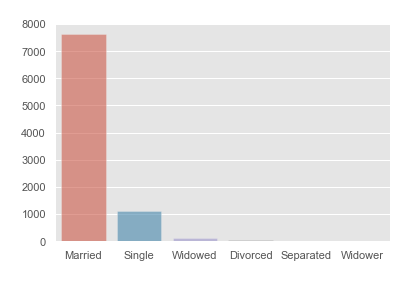

In [10]:
# data exploration of marital status
mstatus_counts = df['Marital_Status'].value_counts()
sns.barplot(mstatus_counts.index, mstatus_counts.values, alpha=0.6)
plt.title('Frquency Distribution of Marital Status', color='white')
plt.ylabel('Number of Occurences', fontsize=12, color='white')
plt.xlabel('Marital Status', fontsize=12, color='white')
plt.show()

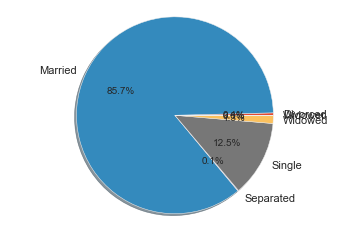

In [11]:
labels = df['Marital_Status'].astype('category').cat.categories.tolist()
counts = df['Marital_Status'].value_counts()
sizes = [counts[var] for var in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [12]:
# use sci-kit learn's LabelBinarizer to convert Marital Status values to 

lb = LabelBinarizer()
lb_results = lb.fit_transform(df['Marital_Status'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()
# print(df.head())

,Divorced,Married,Separated,Single,Widowed,Widower
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [13]:
# using pandas replace() and dictionary comprehensions to encode marital status with new values
labels = df['Marital_Status'].astype('category').cat.categories.tolist()
replace_map_mstatus = {'Marital_Status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map_mstatus

{'Marital_Status': {'Divorced': 1,
  'Married': 2,
  'Separated': 3,
  'Single': 4,
  'Widowed': 5,
  'Widower': 6}}

In [14]:
map_mstatus = {
    'Divorced': 1,
    'Married': 2,
    'Seperated': 3,
    'Single': 4,
    'Widowed': 5,
    'Widower': 6
}

In [15]:
# mapping the column Marital_Status from df to dictionary mapping 
# df['Coded_Marital_Status'] = df['Marital_Status'].map(map_mstatus)
df['Coded_Marital_Status'] = df['Marital_Status'].map(map_mstatus)
df.head()

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country,Coded_Marital_Status
0,1,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America,2.0
1,2,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America,2.0
2,3,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America,4.0
3,4,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America,2.0
4,5,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America,1.0


Modify the dates so the new feature will say length of duration, do this by rounding start and end dates into nearest month of a certian year. The calculate the difference between start and end year, and the difference between start and end month. Drop the days. We will get the duration of the project. This will be the new feature along with rounded year.

In [16]:
type(df['StartDate'][0])

str

In [17]:
split_series_start = df['StartDate'].str.split('/')
split_series_start

0        [3, 1, 2013]
1       [11, 1, 2011]
2        [1, 1, 2013]
3        [7, 1, 2015]
4        [8, 1, 2011]
            ...      
8895     [1, 1, 2015]
8896    [12, 1, 2009]
8897     [9, 1, 2005]
8898     [7, 1, 2009]
8899    [11, 1, 2015]
Name: StartDate, Length: 8900, dtype: object

In [18]:
split_series_start[0][2]

'2013'

In [19]:
nums = np.arange(0, 8899)
start_yr = np.array([])
for i in nums:
    start_yr = np.append(start_yr, split_series_start[i][2])

In [20]:
start_yr

array(['2013', '2011', '2013', ..., '2009', '2005', '2009'], dtype='<U32')

In [21]:
split_series_end = df['EndDate'].str.split('/')
split_series_end 

0       [12, 31, 2013]
1        [4, 30, 2012]
2       [12, 31, 2013]
3        [2, 29, 2016]
4        [7, 31, 2012]
             ...      
8895    [12, 31, 2015]
8896     [6, 30, 2010]
8897     [8, 31, 2006]
8898     [5, 31, 2010]
8899     [3, 31, 2016]
Name: EndDate, Length: 8900, dtype: object

In [22]:
split_series_end[0][2]

'2013'

In [23]:
end_yr = np.array([])
for i in nums:
    end_yr = np.append(end_yr, split_series_end[i][2])
end_yr

array(['2013', '2012', '2013', ..., '2010', '2006', '2010'], dtype='<U32')

In [24]:
df['End_Yr'] = pd.DataFrame(end_yr)
df['Start_Yr'] = pd.DataFrame(start_yr)

In [25]:
df.head()

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country,Coded_Marital_Status,End_Yr,Start_Yr
0,1,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America,2.0,2013,2013
1,2,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America,2.0,2012,2011
2,3,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America,4.0,2013,2013
3,4,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America,2.0,2016,2015
4,5,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America,1.0,2012,2011


In [26]:
split_series_start[0][1]

'1'

In [27]:
start_mnth = np.array([])
for i in nums:
    start_mnth=np.append(start_mnth, split_series_start[i][0])

In [28]:
end_mnth = np.array([])
for i in nums:
    end_mnth=np.append(end_mnth, split_series_end[i][0])

In [29]:
df['End_Mnth'] = pd.DataFrame(end_mnth)
df['Start_Mnth'] = pd.DataFrame(start_mnth)

In [30]:
df.head()

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country,Coded_Marital_Status,End_Yr,Start_Yr,End_Mnth,Start_Mnth
0,1,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America,2.0,2013,2013,12,3
1,2,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America,2.0,2012,2011,4,11
2,3,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America,4.0,2013,2013,12,1
3,4,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America,2.0,2016,2015,2,7
4,5,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America,1.0,2012,2011,7,8


In [31]:
# convert the years into months 
# add the start and end months onto the start and end years in months
# compute the difference in start and end years in months
# create a new column
df['End_Yr'] = pd.to_numeric(df['End_Yr'])
df['Start_Yr'] = pd.to_numeric(df['Start_Yr'])

In [32]:
df.head()

,Unnamed: 0,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country,Coded_Marital_Status,End_Yr,Start_Yr,End_Mnth,Start_Mnth
0,1,5485,3/1/2013,12/31/2013,Married,2,Erlanger,KY,41018,United States of America,2.0,2013.0,2013.0,12,3
1,2,4454,11/1/2011,4/30/2012,Married,2,Spanish Fort,AL,36527,United States of America,2.0,2012.0,2011.0,4,11
2,3,767,1/1/2013,12/31/2013,Single,1,Lexington,KY,40517,United States of America,4.0,2013.0,2013.0,12,1
3,4,6368,7/1/2015,2/29/2016,Married,2,Manheim,PA,17545,United States of America,2.0,2016.0,2015.0,2,7
4,5,1919,8/1/2011,7/31/2012,Divorced,1,Jacksonville,FL,32258-5434,United States of America,1.0,2012.0,2011.0,7,8
